<a href="https://colab.research.google.com/github/jbakery/Python-Portfolio/blob/main/House_Price_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Attribute Descriptions for the Boston Housing Dataset**

| **Attribute** | **Description** |
|---------------|------------------|
| **CRIM**      | Per capita crime rate by town. |
| **ZN**        | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS**     | Proportion of non-retail business acres per town. |
| **CHAS**      | Charles River dummy variable (1 if tract bounds river; 0 otherwise). |
| **NOX**       | Nitric oxides concentration (parts per 10 million). |
| **RM**        | Average number of rooms per dwelling. |
| **AGE**       | Proportion of owner-occupied units built prior to 1940. |
| **DIS**       | Weighted distances to five Boston employment centres. |
| **RAD**       | Index of accessibility to radial highways. |
| **


In [21]:
#House Price Prediction Using Linear Regression

#First step to install/import the needed Python packages to build the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [9]:
#importing data from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/altavish/boston-housing-dataset/versions/1


In [32]:
#Read Housing Dataset

housing_dataset_dirty = pd.read_csv('/content/HousingData.csv')

housing_dataset_dirty.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [33]:
#Linear regression functions cannot handle NaN values so the rows containing NaNs are removed.

housing_dataset = housing_dataset_dirty.dropna()

housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [34]:
#Check size of the housing dataset

housing_dataset.shape


(394, 14)

In [35]:
# Before Training a Machine Learning algorithm it is a good idea to plot
# data creating correlation matrix

plt.rcParams["figure.figsize"] = (20,10)
corr = housing_dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: >

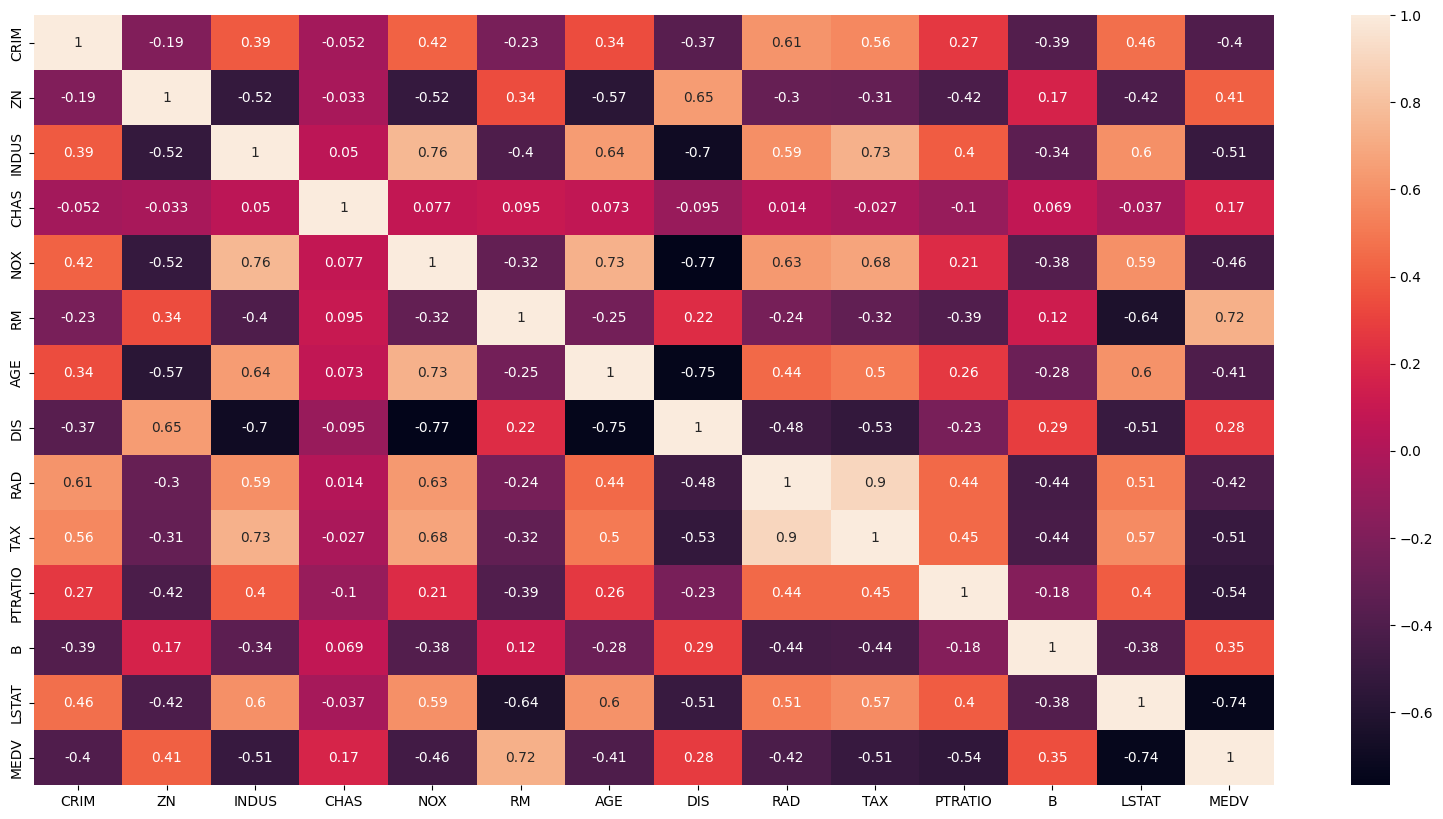

In [36]:
# Creating Correlation Matrix

sns.heatmap(corr, annot=True)

In [37]:
# Next step is to dived the data set into features and labels. Feature = X axis, and Labels = Y axis.

X = housing_dataset.drop(["MEDV"], axis = 1)
y = housing_dataset.filter(["MEDV"], axis = 1)

In [38]:
#All the features the model will use as inputs
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [39]:
#The Labels the model will out as output
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7


In [40]:
#Divide data in train and test sets, and then train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

house_predictor = LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)

In [44]:
#Evaluating The Performance Of a Trained Model

# Mean Absolute Error: MAE is calculated by taking the average of absolute error obtained by subtracting the real values from predicted values

# Mean Squared Error: MSE is similar to the MSE.
#However, error for each record is squared in the case of MSE in order to punish the data record with a huge difference between predicted and actual values

#Root Mean Squared Error: is simply the under root of mean squared error.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 3.3679832251542403
Mean Squared Error: 31.45404766495083
Root Mean Squared Error: 5.6083908266944835


Mean Absolute Error 3.36 means on average, there is an error of 3.36 dollars between the actual and predicted values.

In [45]:
#The actual and predicted values can be plotted side by side.

comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,[25.0],[29.22850198723169]
1,[18.6],[17.50374719998228]
2,[21.0],[21.80803847067081]
3,[23.5],[30.494252800125935]
4,[17.5],[18.502655273021755]
...,...,...
74,[19.9],[19.2657798633253]
75,[38.7],[35.60775919165439]
76,[17.1],[19.34796049311598]
77,[33.4],[28.489825342619444]


In [46]:
#Printing Linear regression coefficients to actually see how the linear coefficient algorithm is making predictions on the test data set.

print(house_predictor.coef_)

[[-1.12187394e-01  4.24404148e-02  2.56728238e-02  1.98383708e+00
  -1.70792571e+01  4.25809072e+00 -2.17413906e-02 -1.42418883e+00
   2.35587949e-01 -1.19971379e-02 -9.75834850e-01  9.59377961e-03
  -3.88619588e-01]]


In [50]:
#Making Predictions on a Single Data Point

X_test.head(1)
single_point = X_test.values[1].reshape(1,-1)
single_point.shape


(1, 13)

In [53]:
# Wrap the row as a DataFrame to retain feature names
row = pd.DataFrame([X_test.values[1]], columns=X_test.columns)

# Predict using the model
prediction = house_predictor.predict(row)
print(prediction)

[[17.5037472]]


17.50 represents thousands of USD for the home price. Its an old data set.